In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot
import platform
from matplotlib import font_manager, rc
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [3]:
df = pd.DataFrame(columns=['가구','가구1','비율'])
df['가구'] = ['1인','2인','3인','4인','5인','6인','7인']
df['가구1'] = [1,2,3,4,5,6,7]

In [6]:
data=pd.read_csv('가구원수별_가구_일반가구___읍면동_2015___시군구_2016__20210321165716.csv',encoding='cp949',header=1)
jeonguk=data[data['행정구역별(읍면동)']=='전국']
list_index=list(jeonguk.T.index[2:])#1인가구~~7인이상
value_pop=list(jeonguk.T.iloc[2:][0])#그들의 값

In [7]:
#퍼센트가 필요하다면
for i in range(2,9):
    print(round(((int(jeonguk.T.iloc[i][0])/int(jeonguk.T.iloc[1][0]))*100),2))
    df.iloc[[i-2]] = [f'{i-1}인',i-1,(round(((int(jeonguk.T.iloc[i][0])/int(jeonguk.T.iloc[1][0]))*100),2))]

30.22
27.84
20.73
16.22
3.94
0.82
0.23


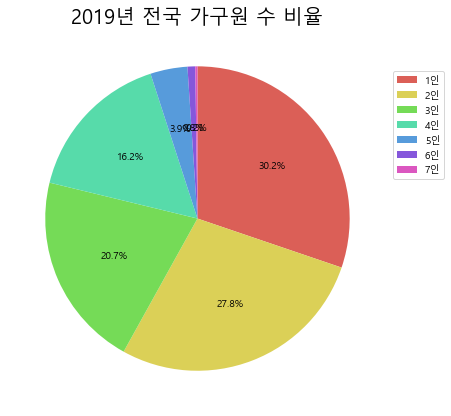

In [11]:
colors = sns.color_palette('hls',len(df['가구']))

fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
ax = fig.add_subplot()

pie = ax.pie(df['비율'], startangle=90, counterclock=False, colors=colors, autopct='%1.1f%%')
plt.legend(pie[0],df['가구'],bbox_to_anchor=(1, 0.9))
plt.title('2019년 전국 가구원 수 비율',fontsize=20)
plt.show()